In [2]:
from random import randint as randi
from random import random as rand
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,9)
from random import random as randn
from matplotlib.markers import MarkerStyle as MS
import math


# Supervis. Vs Não Supervis.

In [3]:
c1 = 1,1
c2 = 2,2
s = 1

n = 50

x = np.zeros(n)
y = np.zeros(n)

x[:n//2] = np.array([c1[0] + randn()/s  for _ in range(n//2) ])
x[n//2:] = np.array([c2[0] + randn()/s  for _ in range(n//2) ])

y[:n//2] = np.array([c1[1] + randn()/s  for _ in range(n//2) ])
y[n//2:] = np.array([c2[1] + randn()/s  for _ in range(n//2) ])

g = np.array([0 if i < n//2 else 1 for i in range(n)])

x, y


(array([ 1.82923402,  1.05201026,  1.28586029,  1.79442369,  1.35962615,
         1.77166963,  1.20999023,  1.40046317,  1.45427951,  1.61540546,
         1.09537706,  1.74724739,  1.55042722,  1.10567676,  1.34086789,
         1.4931571 ,  1.10967614,  1.94890723,  1.38573606,  1.61318193,
         1.86931903,  1.40464017,  1.02489081,  1.30381204,  1.97308334,
         2.51929705,  2.80169782,  2.53892907,  2.93259125,  2.17032887,
         2.42733736,  2.82252942,  2.10720515,  2.94941444,  2.2333596 ,
         2.78067323,  2.52780437,  2.02402738,  2.39537183,  2.5744703 ,
         2.59910146,  2.46765795,  2.63723568,  2.84981325,  2.32205128,
         2.15623964,  2.22540205,  2.97736485,  2.58402209,  2.66075396]),
 array([ 1.56527361,  1.2060847 ,  1.21933   ,  1.20185703,  1.214786  ,
         1.05742718,  1.78919337,  1.56463547,  1.56316311,  1.44478225,
         1.89418176,  1.72126039,  1.99503434,  1.86409687,  1.43276864,
         1.75949308,  1.79969873,  1.09847509,  1

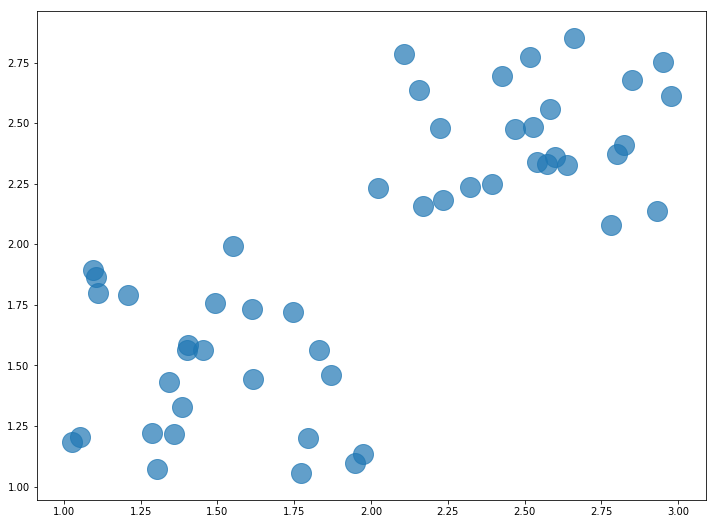

In [4]:
plt.scatter(x, y, s = 400, alpha = .7)

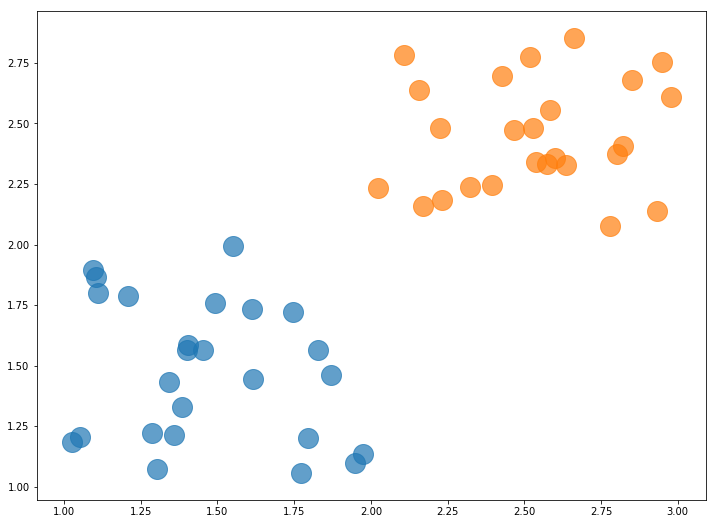

In [5]:
for i in set(g):
    plt.scatter(x[g==i], y[g==i], s = 400, alpha = .7)

# Breast Cancer Wisconsin (Diagnostic) Database

In [6]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [7]:
data = load_breast_cancer()

In [8]:
y = data["target"]

In [9]:
data = pd.DataFrame(data = data["data"], columns=data["feature_names"])

In [10]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Single Feature Analysis

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import minmax_scale as MMS

## Visualizar distribuições das classes

In [ ]:
# plotar uma individual

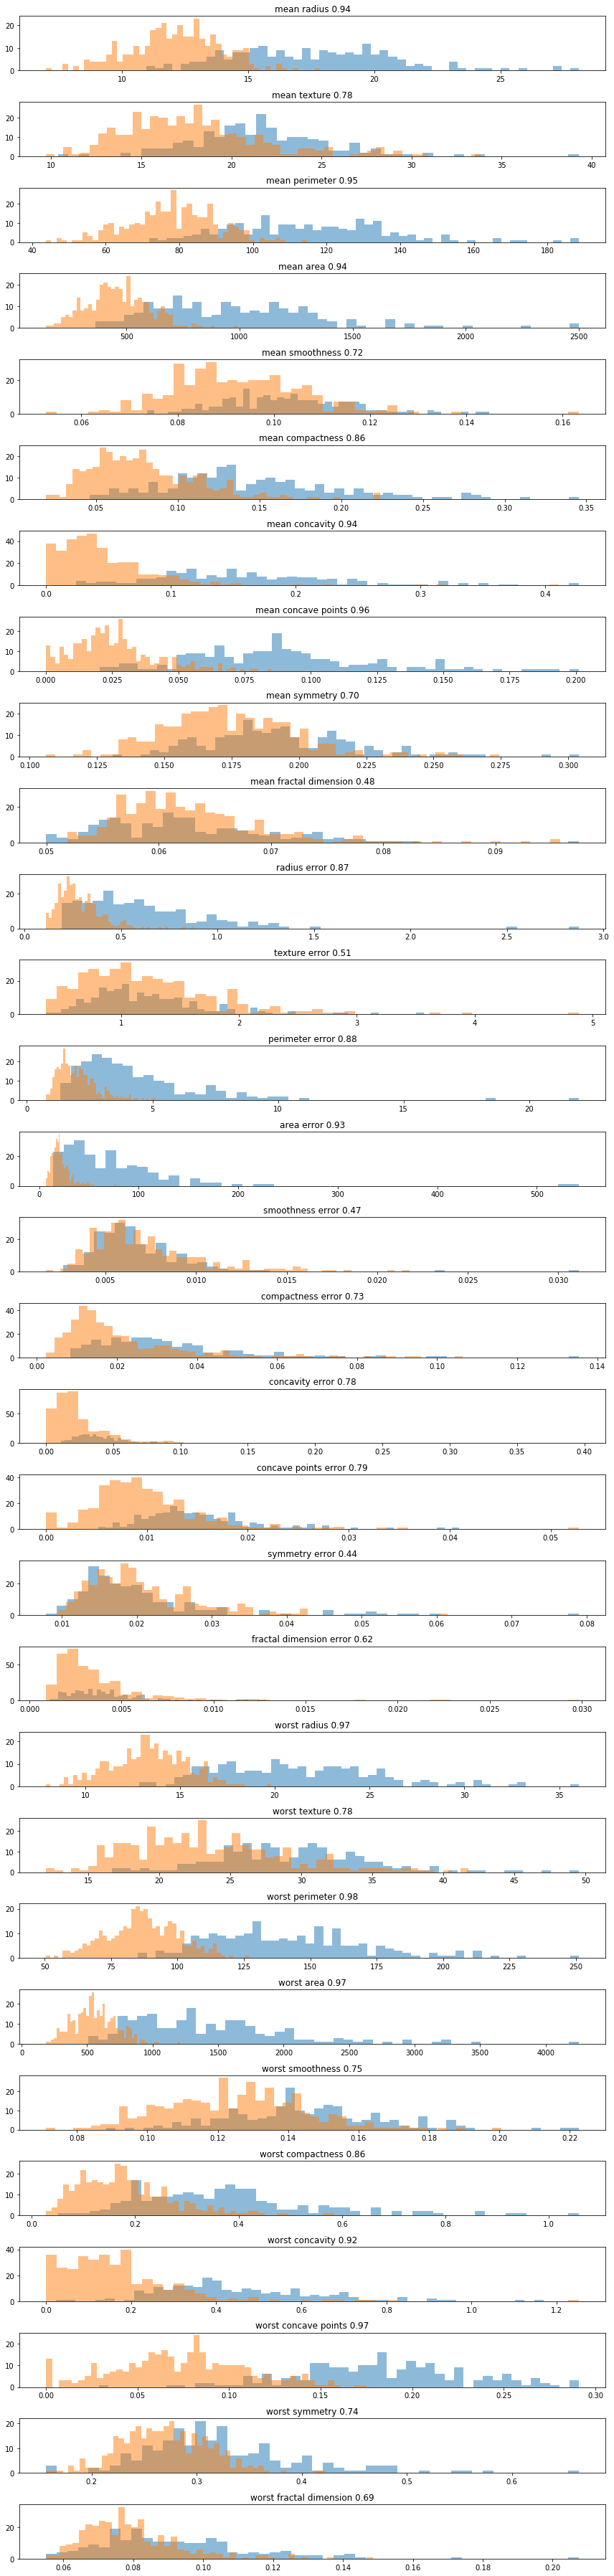

In [17]:
plt.figure(figsize=(12,50))
cols = data.columns
n = len(cols)
for j, col in enumerate(cols):
    plt.subplot(n,1,j+1)
    for i in {1,0}:
        plt.hist(data.loc[y==i,col], bins = 50, alpha = .5)
    #plt.title((col + " %.2f") % roc_auc_score(1-y, MMS(data[col])))
plt.tight_layout()

## Medida 1 de dissociação (AUC)

In [13]:
def pltROC():
    plt.ylim((0,1))
    plt.xlim((0,1))
    plt.ylabel("TPR")
    plt.xlabel("FPR")
    plt.plot((0,1), (0,1), c="black")

mean radius               0.93751651604
mean texture              0.775824480736
mean perimeter            0.946897626975
mean area                 0.938315892395
mean smoothness           0.722041646847
mean compactness          0.863782305375
mean concavity            0.937827017599
mean concave points       0.964437661857
mean symmetry             0.698562443845
mean fractal dimension    0.48453437979
radius error              0.868334126103
texture error             0.511594260346
perimeter error           0.876393953808
area error                0.92641113049
smoothness error          0.468837535014
compactness error         0.727280534855
concavity error           0.780818931346
concave points error      0.791792188574
symmetry error            0.444889276465
fractal dimension error   0.620302838116
worst radius              0.970442894139
worst texture             0.784630833465
worst perimeter           0.975450557582
worst area                0.969828497437
worst smoothness   

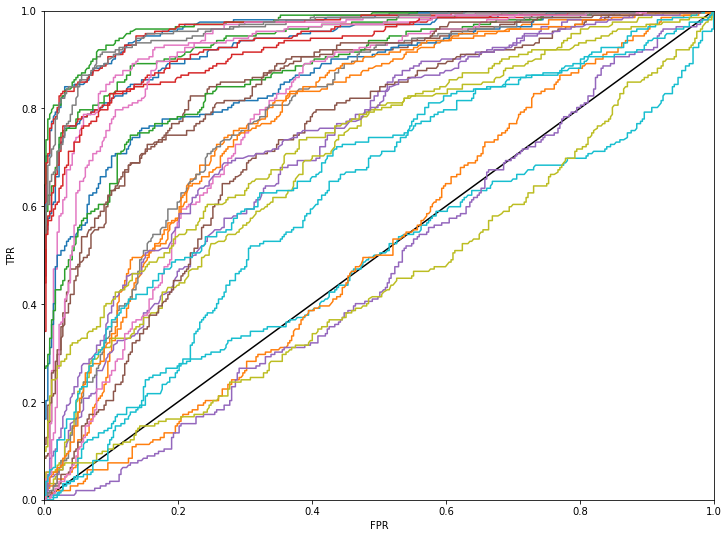

In [15]:
pltROC()
for col in data.columns:
    fpr, tpr, _ = roc_curve(1-y, MMS(data[col])) # 3xplicar 1-y
    print("%-25s" % col, auc(fpr, tpr))
    plt.plot(fpr, tpr)

## Medida 2 de dissociação (logloss)

In [33]:
Hx = np.linspace(10**-6, 1 - 10**-6 , 100)
y1 = -np.log(Hx)
y0 = -np.log(1 - Hx)

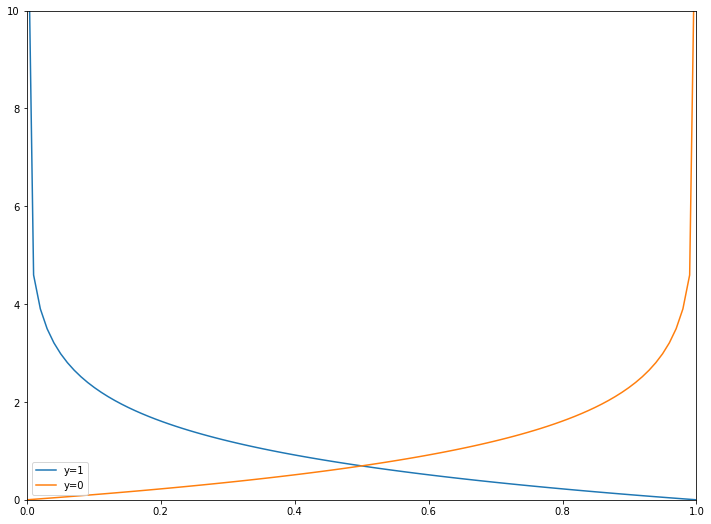

In [38]:
plt.plot(Hx, y1, label = "y=1")
plt.plot(Hx, y0, label = "y=0")
plt.ylim((0,10))
plt.xlim((0,1))
plt.legend()

### Multifeature...

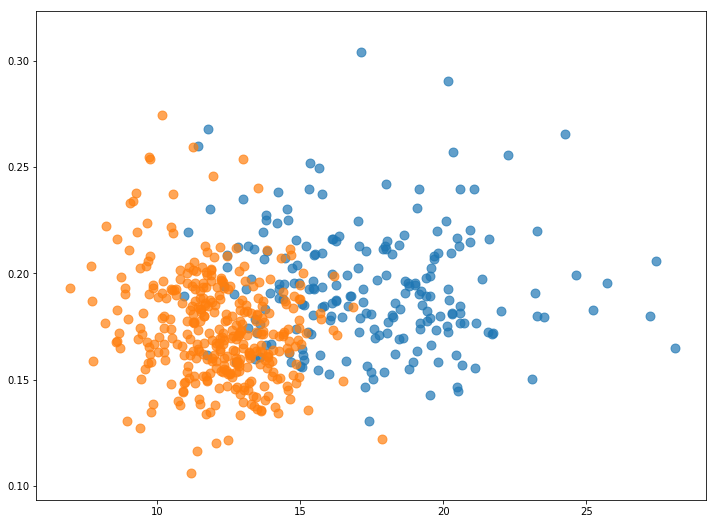

In [20]:
for i in {1,0}:
    plt.scatter(data.loc[y==i,"mean radius"], data.loc[y==i,"mean symmetry"], alpha = .7, s = 80)
